In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib.ticker as mtick
%matplotlib inline 

In [5]:
data =pd.read_csv("/Users/udaysinghshekhawat/Downloads/Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


univarient analysis

In [8]:
data_new=data[['Geography','Gender','Exited']]
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


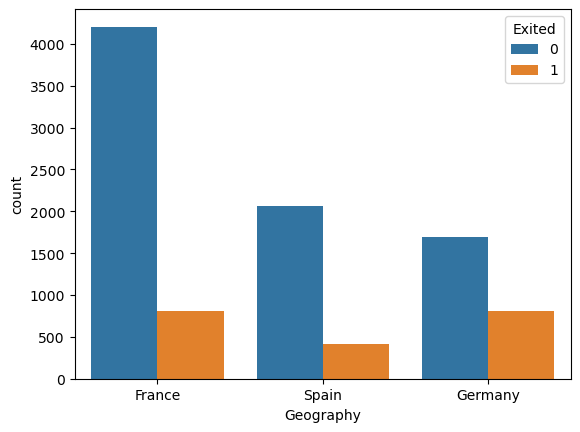

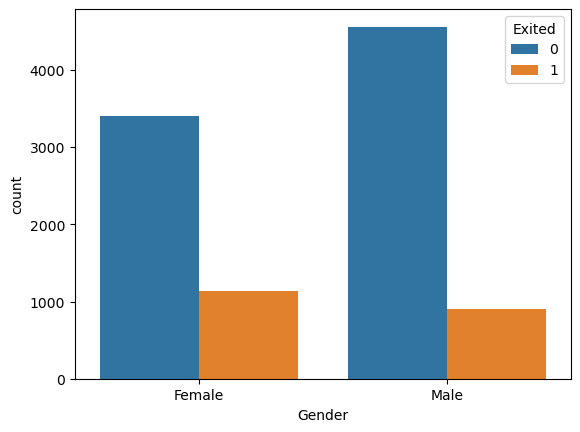

In [10]:
for i, predictor in enumerate(data_new.drop(columns=['Exited'])):
    plt.figure()
    sns.countplot(data=data_new, x=predictor, hue='Exited')



bivarient analysis

<Axes: xlabel='Gender', ylabel='Count'>

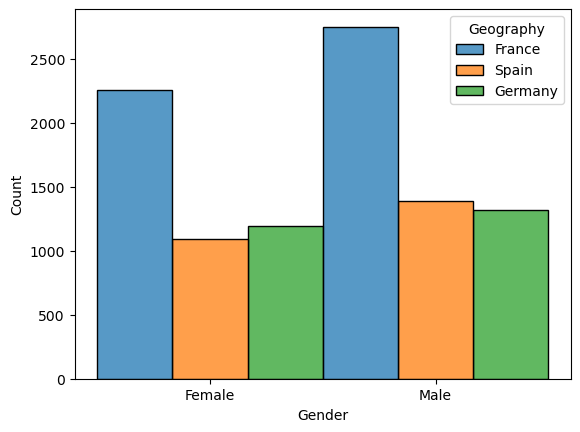

In [13]:
sns.histplot(x='Gender',hue='Geography',data=data_new, stat='count',multiple='dodge')

In [36]:
non_numeric_cols = data.select_dtypes(include=['object']).columns
print(non_numeric_cols)


Index(['Surname', 'Geography', 'Gender'], dtype='object')


In [26]:
data_numeric = data.select_dtypes(exclude=['object'])
correlation_matrix = data_numeric.corr()


In [30]:
data_encoded = pd.get_dummies(data, drop_first=True)
correlation_matrix = data_encoded.corr()


<Axes: >

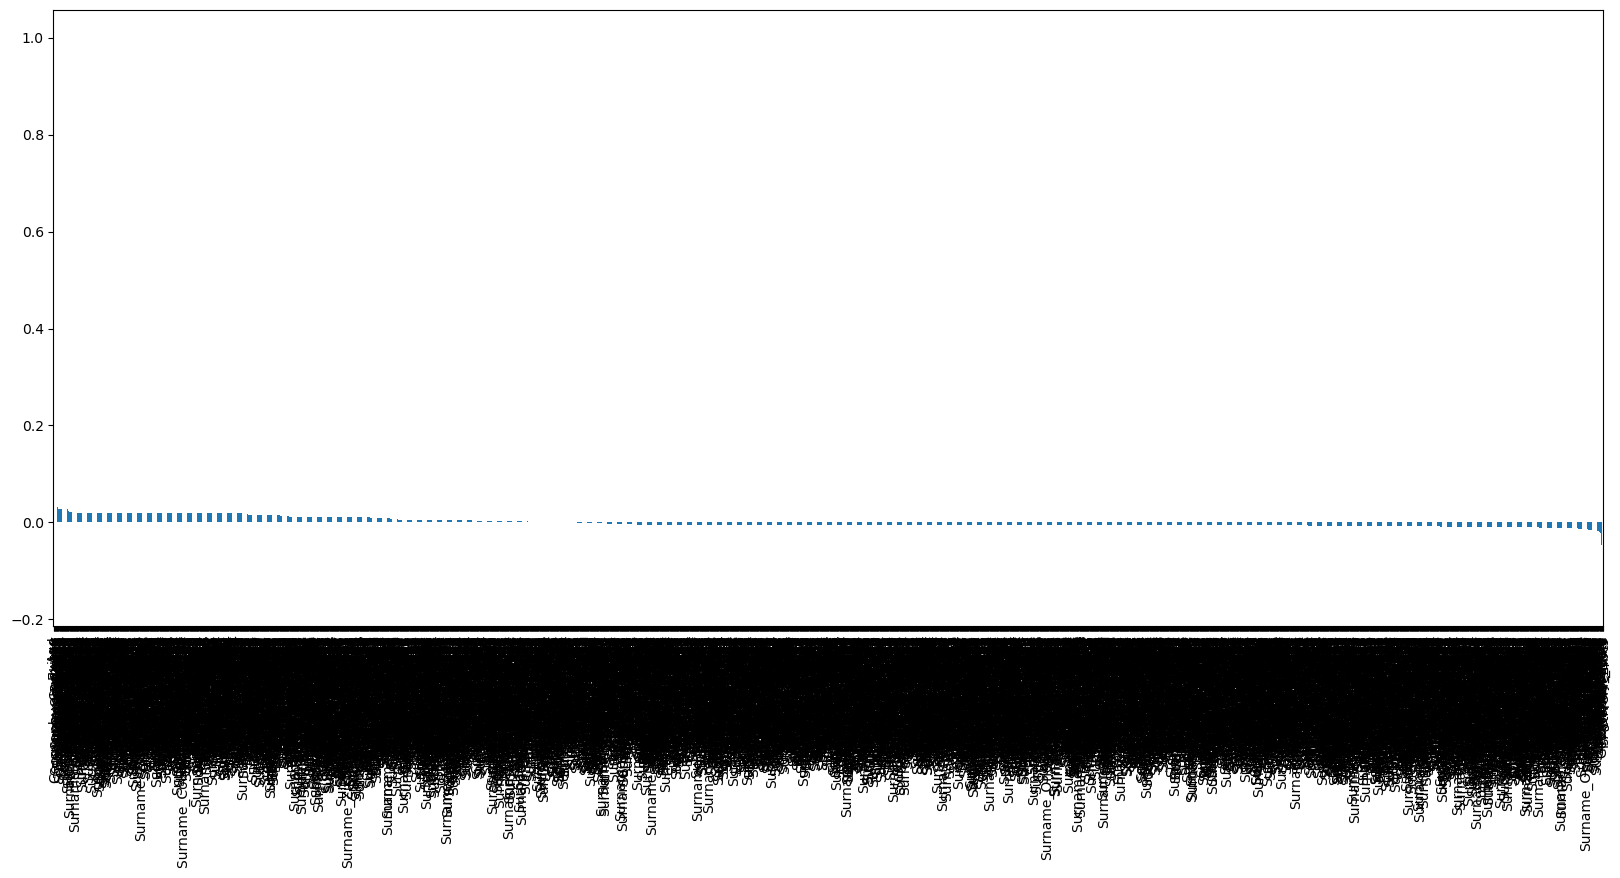

In [32]:
plt. figure(figsize=(20,8))
data_encoded.corr()['Exited'].sort_values(ascending=False).plot(kind='bar')

/var/folders/wp/l1lbtpb57rl387801fcn64ch0000gn/T/ipykernel_11550/2660185833.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns. kdeplot(data.Age[(data["Exited"]==0)],
/var/folders/wp/l1lbtpb57rl387801fcn64ch0000gn/T/ipykernel_11550/2660185833.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns. kdeplot(data.Age[(data["Exited"]==1)],


Text(0.5, 1.0, 'Age by churn')

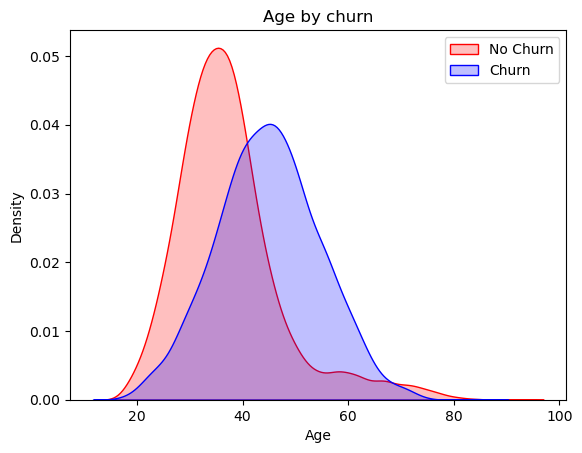

In [40]:
Tot = sns. kdeplot(data.Age[(data["Exited"]==0)],
color="Red", shade=True)
Tot = sns. kdeplot(data.Age[(data["Exited"]==1)],
color="Blue", shade=True)
Tot. legend(["No Churn", "Churn"], loc='upper right')
Tot. set_ylabel( 'Density')
Tot .set_xlabel('Age')
Tot. set_title('Age by churn')